AdaBoost만 사용해서 사람 얼굴 학습

c:\Users\HKIT\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.47


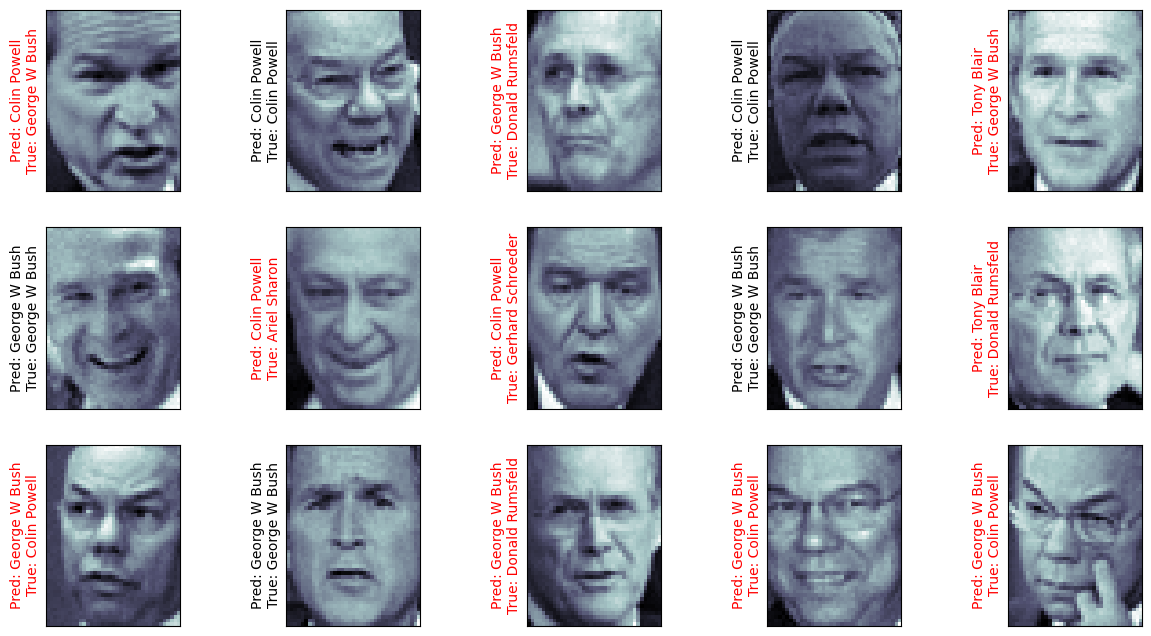

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people # 사람 얼굴 데이터셋 모듈
from sklearn.ensemble import AdaBoostClassifier # 에이다 부스트 분류기
from sklearn.tree import DecisionTreeClassifier # 결정 트리분류기
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#노이즈 추가 함수
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor*np.random.normal(loc=0.0,scale=1.0,size = images.shape)
    noisy_images = np.clip(noisy_images,0,255)
    return noisy_images


# LFW(얼굴 데이터셋) 데이터 로드
# min_faces_person = 사람당 최소 얼굴 갯수 예)홍길동 => 최소 얼굴 사진 70개 있음
# resize = 0.4 : 실제 사진 사이즈 *0.4
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# 데이터와 라벨 준비
# x: 얼굴 이미지
# y: 사람 식별번호
# target_names: 사람 이름
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
noise = [0.01,0.1,0.3,0.5,0.7,0.9]
accuracy_data = []


# 특정 인물만 골라 분류하기 (예: Ariel Sharon)
#y = (y == np.where(target_names == 'Ariel Sharon')[0][0]).astype(int)

for noise_value in noise:
    # 데이터 분할
    # 학습 70%, 훈련 30%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


    #노이즈 추가
    X_train = add_noise(X_train, noise_factor=0.01)
    X_test = add_noise(X_test, noise_factor= 0.01)

    # AdaBoost 분류기 설정
    # DecisionTreeClassifier를 약한 학습자로 사용
    # 깊이를 3으로 설정
    base_estimator = DecisionTreeClassifier(max_depth=3)
    adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=0)

    # 모델 훈련
    adaboost.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = adaboost.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Accuracy: {accuracy:.2f}')
    accuracy_data.append(accuracy)
    # 예측 결과 시각화
    fig, ax = plt.subplots(3, 5, figsize=(15, 8))
    for i, axi in enumerate(ax.flat):
        axi.imshow(X_test[i].reshape(50, 37), cmap='bone')
        axi.set(xticks=[], yticks=[])
        axi.set_ylabel(f'Pred: {target_names[y_pred[i]]}\nTrue: {target_names[y_test[i]]}',
                    color='black' if y_pred[i] == y_test[i] else 'red')
    plt.show()


1. 특정 인물인지를 파악하는 문제

예) Ariel Sharon 이란 인물만 분류하는 이진문제

결과가 0 or 1 만 나오기 때문에 노이즈가 있어도 비슷한 결과가 나올 수 있음

2. 결정 트리 깊이가 1이라 매우 단순한 모델을 사용 -> 과소적합을 일으킬 수 있어서 데이터의 충분한 복잡성을 학습하지 못 할수도 있음


모든 인물을 포함하는 